<a href="https://colab.research.google.com/github/Batman2002/boilerplate-demographic-data-analyzer-2/blob/main/boilerplate_medical_data_visualizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("medical_examination.csv",index_col="id")
df2=pd.read_csv("medical_examination.csv")
df3=pd.read_csv("medical_examination.csv",index_col="id")
df4=pd.read_csv("medical_examination.csv",index_col="id")
# df3.loc[df["cholesterol"]==1]=0
# df3.loc[df["cholesterol"]>1]=1
df["overweight"]=(df["weight"]/((df["height"]/100)**2))
df.loc[df["overweight"]<=25]=0
df.loc[df["overweight"]>25]=1
# df2["overweight"]=df["overweight"]
df2["cholesterol"]=0
df2["cholesterol"]=df3["cholesterol"]
# df_cat=df2.melt(id_vars=["id"],value_vars=["cholesterol","gluc","smoke","alco","active","overweight"])
# df_cat
df2

id    age  sex  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0  18393    2     168    62.0    110     80          1.0     1   
1          1  20228    1     156    85.0    140     90          3.0     1   
2          2  18857    1     165    64.0    130     70          3.0     1   
3          3  17623    2     169    82.0    150    100          1.0     1   
4          4  17474    1     156    56.0    100     60          1.0     1   
...      ...    ...  ...     ...     ...    ...    ...          ...   ...   
69995  99993  19240    2     168    76.0    120     80          NaN     1   
69996  99995  22601    1     158   126.0    140     90          1.0     2   
69997  99996  19066    2     183   105.0    180     90          NaN     1   
69998  99998  22431    1     163    72.0    135     80          1.0     2   
69999  99999  20540    1     170    72.0    120     80          3.0     1   

       smoke  alco  active  cardio  
0          0     0       1       0  
1          0     0       1       1  
2          0     0       0       1  
3          0     0       1       1  
4          0     0       0       0  
...      ...   ...     ...     ...  
69995      1     0       1       0  
69996      0     0       1       1  
69997      0     1       0       1  
69998      0     0       0       1  
69999      0     0       1       0  

[70000 rows x 13 columns]

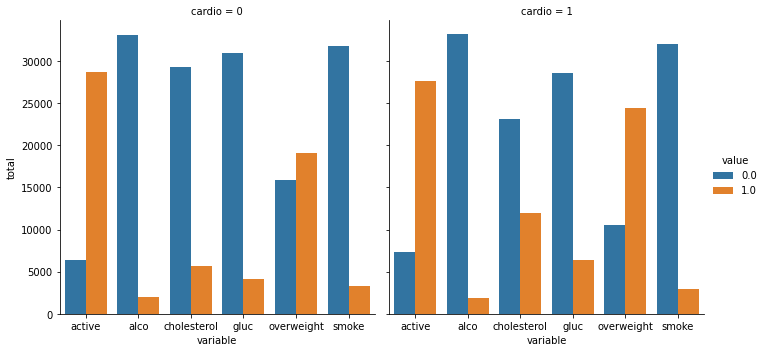

In [ ]:
df=pd.read_csv("medical_examination.csv")
df2=pd.read_csv("medical_examination.csv")
df3=pd.read_csv("medical_examination.csv")
df4=pd.read_csv("medical_examination.csv")
df3.loc[df3["cholesterol"]==1]=0
df3.loc[df3["cholesterol"]>1]=1
df4.loc[df4["gluc"]==1]=0
df4.loc[df4["gluc"]>1]=1
df["overweight"]=(df["weight"]/((df["height"]/100)**2))
df.loc[df["overweight"]<=25]=0
df.loc[df["overweight"]>25]=1
df2["overweight"]=df["overweight"]
df2["cholesterol"]=df3["cholesterol"]
df2["gluc"]=df4["gluc"]
df_cat=df2.melt(id_vars=["cardio"],value_vars=["cholesterol","gluc","smoke","alco","active","overweight"])
df_cat["total"]=df_cat["value"]
df_cat=df_cat.groupby(["cardio","variable","value"]).count()
dfcat=df_cat.copy()
dfcat=dfcat.reset_index()
dfcat.sort_values("total",ascending=False)
dfcat["value"]=dfcat["value"].astype(str)
dfcat["cardio"]=dfcat["cardio"].astype(str)
dfcat
g=sns.catplot(data=dfcat,x="variable",y="total",col="cardio",hue="value",kind="bar")

In [37]:
df=pd.read_csv("medical_examination.csv")
df2=pd.read_csv("medical_examination.csv")
df3=pd.read_csv("medical_examination.csv")
df4=pd.read_csv("medical_examination.csv")
df3.loc[df3["cholesterol"]==1]=0
df3.loc[df3["cholesterol"]>1]=1
df4.loc[df4["gluc"]==1]=0
df4.loc[df4["gluc"]>1]=1
df["overweight"]=(df["weight"]/((df["height"]/100)**2))
df.loc[df["overweight"]<=25]=0
df.loc[df["overweight"]>25]=1
df2["overweight"]=df["overweight"]
df2["cholesterol"]=df3["cholesterol"]
df2["gluc"]=df4["gluc"]
s=(df2['ap_lo'] >= df2['ap_hi'])
d=df2.loc[s]
df2.drop(d.index,inplace=True)
c=(df2['height'] <= df2['height'].quantile(0.025))
a=(df2['height'] >= df2['height'].quantile(0.975))
b=df2.loc[a]
d=df2.loc[c]
df2.drop(b.index,inplace=True)
df2.drop(d.index,inplace=True)
g=(df2['weight'] <= df2['weight'].quantile(0.025))
f=(df2['weight'] >= df2['weight'].quantile(0.975))
j=df2.loc[f]
k=df2.loc[g]
df2.drop(j.index,inplace=True)
df2.drop(k.index,inplace=True)
df2=df2.corr()
mask = np.triu(np.ones_like(df2))
# df2=df2.round(decimals=2)
# df2=df2.round(decimals=1)
df2
# fig,ax=plt.subplots()
# ax.plot(data=sns.heatmap(df2,mask=mask,annot=True))

id       age       sex    height    weight     ap_hi  \
id           1.000000  0.002583  0.004373  0.002861  0.002132  0.003019   
age          0.002583  1.000000 -0.015064 -0.073932  0.071344  0.020544   
sex          0.004373 -0.015064  1.000000  0.495463  0.117428  0.003187   
height       0.002861 -0.073932  0.495463  1.000000  0.228502  0.001267   
weight       0.002132  0.071344  0.117428  0.228502  1.000000  0.026891   
ap_hi        0.003019  0.020544  0.003187  0.001267  0.026891  1.000000   
ap_lo        0.001541  0.152522  0.059412  0.012361  0.220776  0.073805   
cholesterol  0.004686  0.128679 -0.036322 -0.062526  0.134952  0.024611   
gluc         0.003356  0.087580 -0.021296 -0.032953  0.104863  0.012078   
smoke       -0.000896 -0.041712  0.337538  0.185264  0.053370 -0.001742   
alco        -0.000589 -0.026958  0.166673  0.083475  0.055310  0.000787   
active       0.005273 -0.012397  0.009606 -0.002240 -0.009343 -0.000951   
cardio       0.003704  0.238470  0.003072 -0.024568  0.165334  0.051128   
overweight   0.000247  0.087491 -0.052786 -0.154472  0.661931  0.018961   

                ap_lo  cholesterol      gluc     smoke      alco    active  \
id           0.001541     0.004686  0.003356 -0.000896 -0.000589  0.005273   
age          0.152522     0.128679  0.087580 -0.041712 -0.026958 -0.012397   
sex          0.059412    -0.036322 -0.021296  0.337538  0.166673  0.009606   
height       0.012361    -0.062526 -0.032953  0.185264  0.083475 -0.002240   
weight       0.220776     0.134952  0.104863  0.053370  0.055310 -0.009343   
ap_hi        0.073805     0.024611  0.012078 -0.001742  0.000787 -0.000951   
ap_lo        1.000000     0.149309  0.073662  0.023556  0.031290  0.003507   
cholesterol  0.149309     1.000000  0.383708  0.012788  0.037717  0.002155   
gluc         0.073662     0.383708  1.000000 -0.005785  0.012922 -0.010001   
smoke        0.023556     0.012788 -0.005785  1.000000  0.340454  0.027174   
alco         0.031290     0.037717  0.012922  0.340454  1.000000  0.026662   
active       0.003507     0.002155 -0.010001  0.027174  0.026662  1.000000   
cardio       0.325608     0.202432  0.088294 -0.020118 -0.012285 -0.036706   
overweight   0.167309     0.125451  0.085603 -0.000564  0.024697 -0.001958   

               cardio  overweight  
id           0.003704    0.000247  
age          0.238470    0.087491  
sex          0.003072   -0.052786  
height      -0.024568   -0.154472  
weight       0.165334    0.661931  
ap_hi        0.051128    0.018961  
ap_lo        0.325608    0.167309  
cholesterol  0.202432    0.125451  
gluc         0.088294    0.085603  
smoke       -0.020118   -0.000564  
alco        -0.012285    0.024697  
active      -0.036706   -0.001958  
cardio       1.000000    0.138590  
overweight   0.138590    1.000000